In [14]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [15]:
# Make some synthetic dataset
N = 1000
X = np.random.random((N, 2)) * 6 - 3 # uniformly distributed between -3 and +3
Y = np.cos(2*X[:,0]) + np.cos(3*X[:,1])

This implements the function:
                            $y = \mathit{cos}(2x_1) + \mathit{cos}(3x_2)$

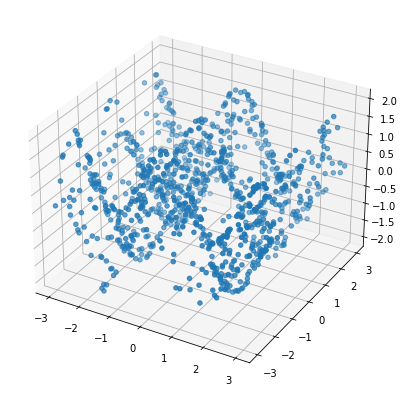

In [16]:
# Plot it
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

In [8]:
# Build the model
model = tf.keras.models.Sequential([
    tf.keras.layers.Dense(128, input_shape=(2,), activation='relu'),
    tf.keras.layers.Dense(1)
])

In [9]:
# Compile and fit
opt = tf.keras.optimizers.Adam(0.01)
model.compile(optimizer=opt, loss='mse')
r = model.fit(X, Y, epochs=100)

Epoch 1/100
32/32 [==============================] - 0s 494us/step - loss: 1.0270
Epoch 2/100
32/32 [==============================] - 0s 586us/step - loss: 1.0245
Epoch 3/100
32/32 [==============================] - 0s 595us/step - loss: 0.9807
Epoch 4/100
32/32 [==============================] - 0s 559us/step - loss: 0.9169
Epoch 5/100
32/32 [==============================] - 0s 606us/step - loss: 0.8795
Epoch 6/100
32/32 [==============================] - 0s 576us/step - loss: 0.8139
Epoch 7/100
32/32 [==============================] - 0s 608us/step - loss: 0.7393
Epoch 8/100
32/32 [==============================] - 0s 530us/step - loss: 0.7019
Epoch 9/100
32/32 [==============================] - 0s 652us/step - loss: 0.6289
Epoch 10/100
32/32 [==============================] - 0s 623us/step - loss: 0.6707
Epoch 11/100
32/32 [==============================] - 0s 587us/step - loss: 0.5817
Epoch 12/100
32/32 [==============================] - 0s 618us/step - loss: 0.5922
Epoch 13/100


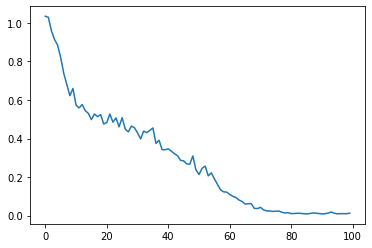

In [10]:
# Plot the loss
plt.plot(r.history['loss'], label='loss')

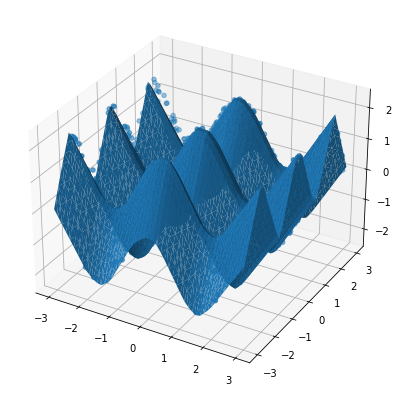

In [12]:
# Plot the prediction surface
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-3, 3, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)

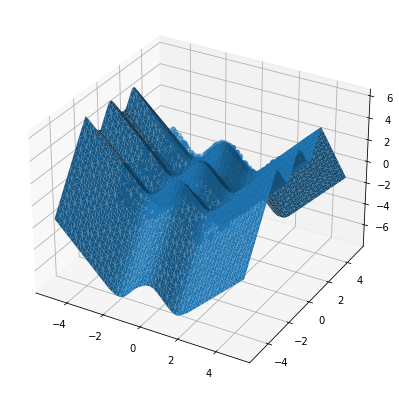

In [13]:
# Plot the prediction surface
# Can it extrapolate?
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], Y)

# Surface plot
line = np.linspace(-5, 5, 50)
xx, yy = np.meshgrid(line, line)
Xgrid = np.vstack((xx.flatten(), yy.flatten())).T
Yhat = model.predict(Xgrid).flatten()
ax.plot_trisurf(Xgrid[:,0], Xgrid[:,1], Yhat, linewidth=0.2, antialiased=True)